In [1]:
import os
import os.path as op

import numpy as np
import matplotlib.pyplot as plt

from hybridfactory.data import dataset as dset
from hybridfactory.probes import probe as prb
from hybridfactory.generate import generator

In [2]:
%matplotlib notebook

In [3]:
# import requests
# sim_binary_link = "https://doc-0g-44-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/n043r2tn9dpsiink3gm4dm3dnevft0bo/1539100800000/13244900412795568766/*/1mtulWWvrKKBJArNJYhjh0-zCiPCHbPng?e=download"
# rez_mat_link = "https://doc-0c-34-docs.googleusercontent.com/docs/securesc/kp1esj8pj7lkuu9qvr442grfbcvf4bp0/blever1159f8vqgcijjo90j8t9k22d0g/1539100800000/13244900412795568766/13244900412795568766/101rWUt1tA6TkAk-pDpEef8Tcy_mEgeCa?h=04407474436263241647&e=download"

In [4]:
np.random.seed(10191)

In [5]:
testdir = op.join(op.abspath("."), "eMouse_demo")
if not op.isdir(testdir):
    os.makedirs(testdir)

In [6]:
filename = op.join(testdir, "sim_binary.dat")
dtype = np.int16
sample_rate = 25000
probe = prb.eMouse()
source = dset.new_annotated_dataset(filename, dtype, sample_rate, probe)
test_unit = 52

In [7]:
hybrid_dir = op.join(testdir, "hybrid")
hybrid = dset.new_hybrid_dataset(source, hybrid_dir, copy=True)

In [8]:
svdgen = generator.SVDGenerator(hybrid, samples_before=30, samples_after=30)

# construct events
events = svdgen.construct_events(test_unit, 6)
events = svdgen.scale_events(events)

# jitter times
event_times = hybrid.unit_firing_times(test_unit)
jittered_times = svdgen.jitter_events(event_times, 100)

# shift channels
channels = hybrid.unit_channels(test_unit, 30, 30)
shifted_channels = svdgen.shift_channels(channels)

In [9]:
chanmap = hybrid.probe.connected_channels()
uw = hybrid.unit_windows(52, 30, 30)
uc = hybrid.unit_channels(52, 30, 30)

<IPython.core.display.Javascript object>


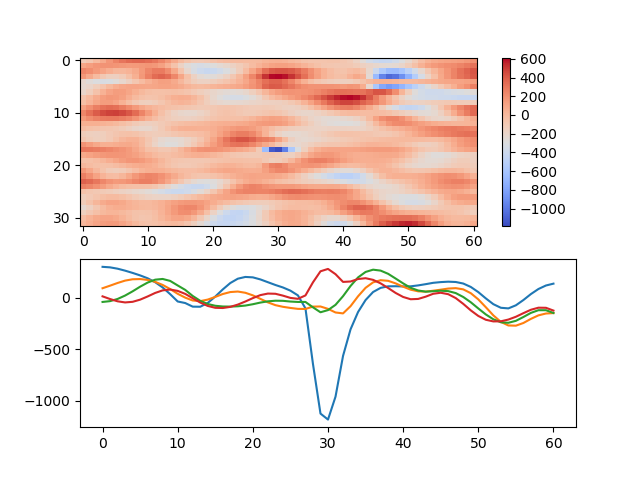

In [10]:
plt.figure()

plt.subplot(2, 1, 1)
plt.imshow(uw[chanmap, :, 0], cmap="coolwarm", aspect="auto", interpolation="nearest")
plt.colorbar()

plt.subplot(2, 1, 2)
plt.plot(uw[uc, :, 0].T)

In [11]:
svdgen.insert_unit(events, jittered_times, shifted_channels, true_unit=test_unit)

<IPython.core.display.Javascript object>


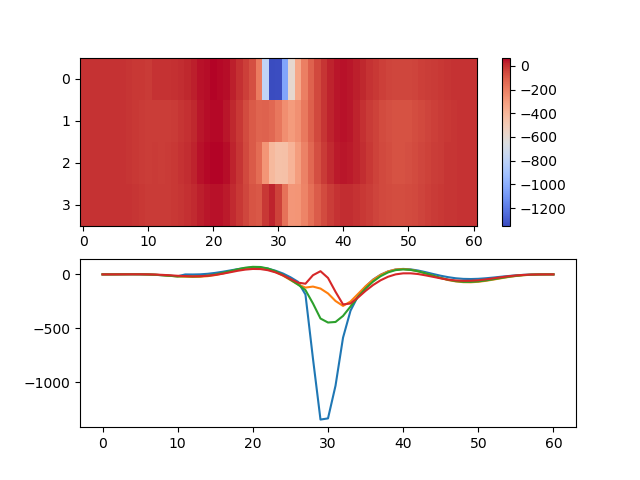

In [12]:
plt.figure()

plt.subplot(2, 1, 1)
plt.imshow(events[:, :, 0], cmap="coolwarm", aspect="auto", interpolation="nearest")
plt.colorbar()

plt.subplot(2, 1, 2)
plt.plot(events[:, :, 0].T)

In [13]:
hybrid.artificial_units

,timestep,true_unit,new_unit,center_channel
0,1038,52,65,0
1,3807,52,65,0
2,5126,52,65,0
3,5919,52,65,0
4,6196,52,65,0
5,8344,52,65,0
6,18725,52,65,0
7,27512,52,65,0
8,28263,52,65,0
9,33504,52,65,0


In [14]:
synth_events = hybrid.unit_windows(65, 30, 30)

<IPython.core.display.Javascript object>


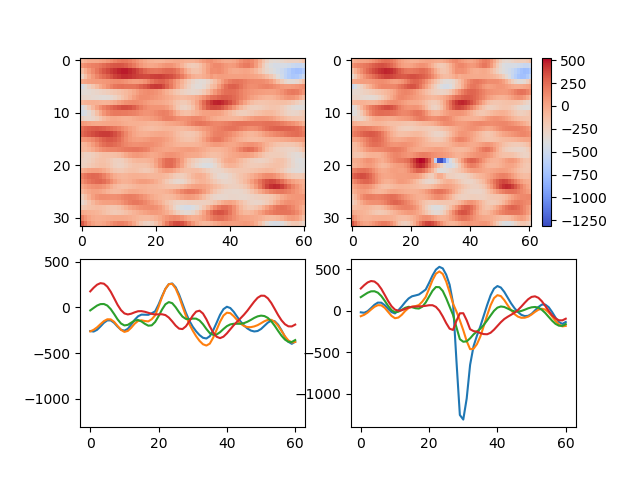

In [15]:
plt.figure()

before_roi = source.read_roi(channels=np.arange(34), samples=np.arange(1008, 1069))

plt.subplot(2, 2, 1)
plt.imshow(before_roi[chanmap, :], cmap="coolwarm", aspect="auto", vmin=synth_events[chanmap, :, 0].min(),
           vmax=synth_events[chanmap, :, 0].max())

plt.subplot(2, 2, 2)
plt.imshow(synth_events[chanmap, :, 0], cmap="coolwarm", aspect="auto", interpolation="nearest")
plt.colorbar()

plt.subplot(2, 2, 3)
plt.plot(before_roi[shifted_channels, :].T)
plt.ylim(synth_events[shifted_channels, :, 0].min(), synth_events[shifted_channels, :, 0].max())

plt.subplot(2, 2, 4)
plt.plot(synth_events[shifted_channels, :, 0].T)

In [16]:
hybrid.export_artificial_units(op.join(hybrid_dir, "artificial_units.csv"))

In [17]:
hybrid.export_ground_truth_matrix(op.join(hybrid_dir, "firings_true.npy"))